In [1]:
import saspy
sas = saspy.SASsession(cfgname='oda')
# sas_html = saspy.SASsession(cfgname='oda', results='HTML')

SAS Connection established. Subprocess id is 1584



In [2]:
cars = sas.sasdata('cars', libref='sashelp')

### plots

In [3]:
cars.columnInfo()

,Member,Num,Variable,Type,Len,Pos,Format,Label
0,SASHELP.CARS,9.0,Cylinders,Num,8.0,24.0,NaN,NaN
1,SASHELP.CARS,5.0,DriveTrain,Char,5.0,147.0,NaN,NaN
2,SASHELP.CARS,8.0,EngineSize,Num,8.0,16.0,NaN,Engine Size (L)
3,SASHELP.CARS,10.0,Horsepower,Num,8.0,32.0,NaN,NaN
4,SASHELP.CARS,7.0,Invoice,Num,8.0,8.0,DOLLAR8.,NaN
5,SASHELP.CARS,15.0,Length,Num,8.0,72.0,NaN,Length (IN)
6,SASHELP.CARS,11.0,MPG_City,Num,8.0,40.0,NaN,MPG (City)
7,SASHELP.CARS,12.0,MPG_Highway,Num,8.0,48.0,NaN,MPG (Highway)
8,SASHELP.CARS,6.0,MSRP,Num,8.0,0.0,DOLLAR8.,NaN
9,SASHELP.CARS,1.0,Make,Char,13.0,80.0,NaN,NaN


In [4]:
df = cars.head()
df.iloc[0,:]

Make             Acura
Model              MDX
Type               SUV
Origin            Asia
DriveTrain         All
MSRP           36945.0
Invoice        33337.0
EngineSize         3.5
Cylinders          6.0
Horsepower       265.0
MPG_City          17.0
MPG_Highway       23.0
Weight          4451.0
Wheelbase        106.0
Length           189.0
Name: 0, dtype: object


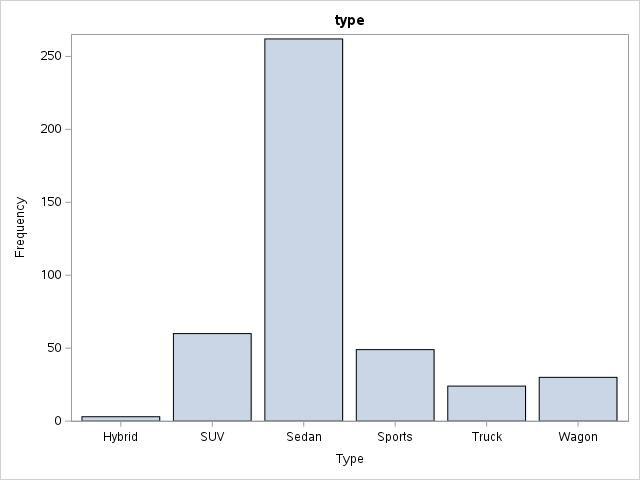

In [5]:
# _ = "drivetrain"
# _ = "origin"
_ = "type"
cars.bar(var=_, title=_)


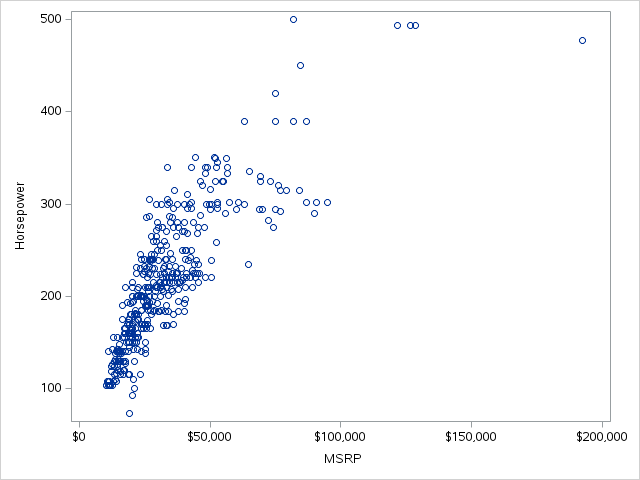

In [12]:
cars.scatter("msrp", "horsepower")


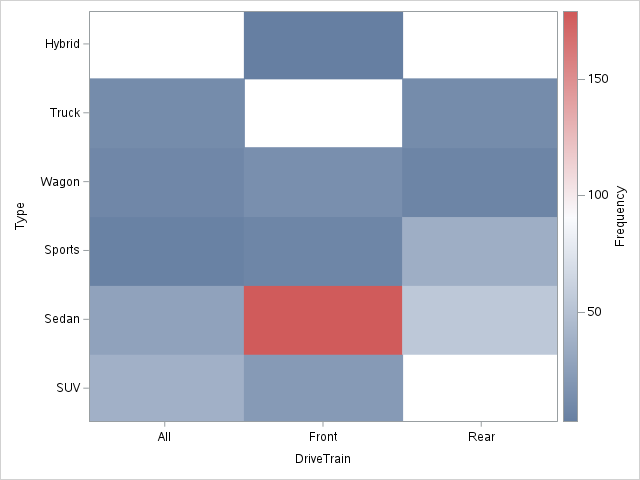

In [16]:
cars.heatmap('drivetrain','type')


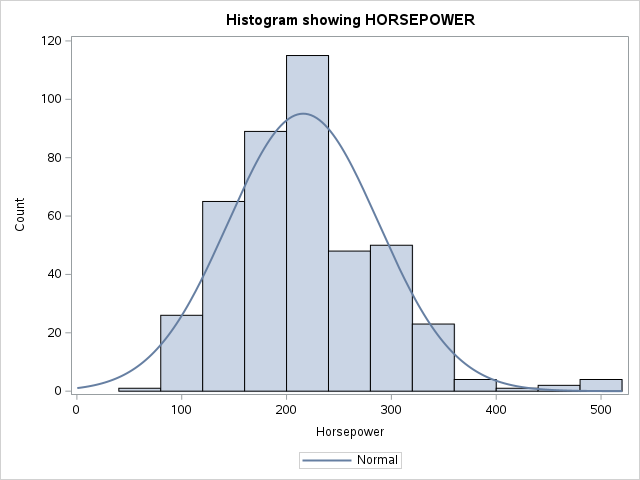


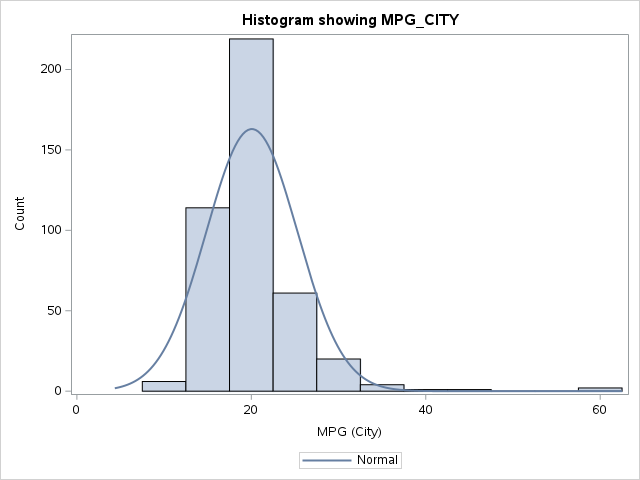


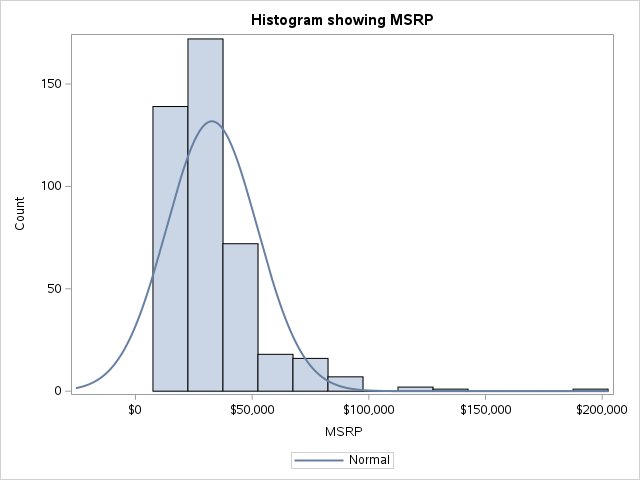

In [17]:
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())


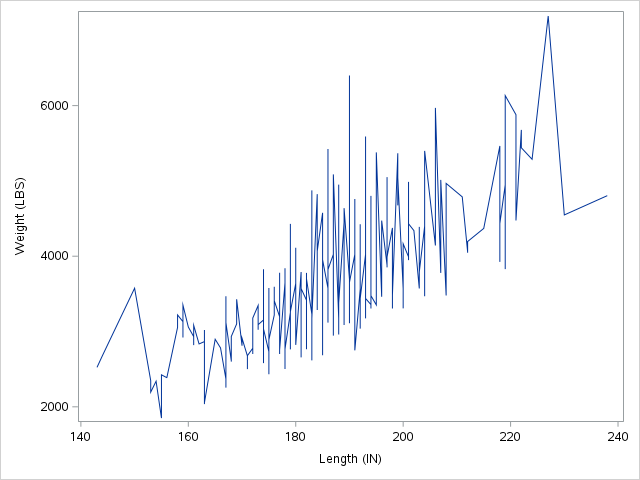

In [21]:
sas.submit("data wkcars; set sashelp.cars; run;")
wkcars = sas.sasdata('wkcars')
wkcars.sort("length")

wkcars.series(x = "length", y = "weight")